In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..\..')))
from Code.descent_methods import *
from Code.utilities import train_test_split, plot_test_results

# analytic gradient methods
from Code.utilities import OLS_train_analgrad, MSELoss_method, feature_matrix

# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling, plot_surface, scale_feature_matrix

import numpy as np

In [4]:
# Initialise beta
num_features = 3
beta0 = {"b" : np.random.random(num_features)}

# Start with small values
beta0 = {"b" : np.random.random(num_features)*0.1}

# beta0 = {"b" : 0*np.random.random(num_features)}




# Sample points and split in train and test
num_points = 200
split=0.2

data = r2_sampling(num_points, sigma2=0.3)
x, y, z = data["x"], data["y"], data["z"]

X = feature_matrix(x, num_features)

f = lambda x :  x**2 + 2*x +3
z = f(x)

X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, split)

### TODO: dette er en quickfix...
y_train, y_test = np.squeeze(y_train), np.squeeze(y_test)

# Number of of minibatch when using batch size 10
m = int(len(y_train) / 10) 
epochs = 20

# Define the polynomial fit model
def model(beta, X):
    # print(beta)
    return np.dot(X, beta["b"])

loss_func = MSELoss_method(model)
loss_grad = OLS_train_analgrad(model)

### Benchmark test

To see that our general implementation does not break everything, we have kept one of the originals...

0.0003027281 0.00027750796


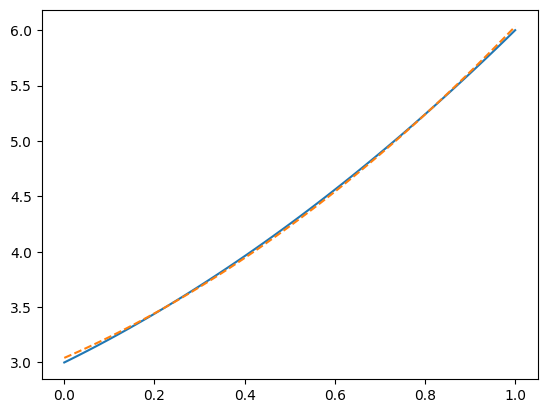

In [5]:
from Code.descent_methods import GD_original
import matplotlib.pyplot as plt

_, loss_list, loss_list2 = GD_original(X_train, y_train, X_test, y_test, loss_grad, model, beta0, lr=0.01, n_epochs=2000)

# plt.plot(loss_list)
# plt.plot(loss_list2, "r--")
# plt.show()

print(min(loss_list), min(loss_list2))

x_vals = np.linspace(0, 1, 100)
plt.plot(x_vals, f(x_vals))
plt.plot(x_vals, model(_[-1], feature_matrix(x_vals, num_features)), "--")

### Plain GD

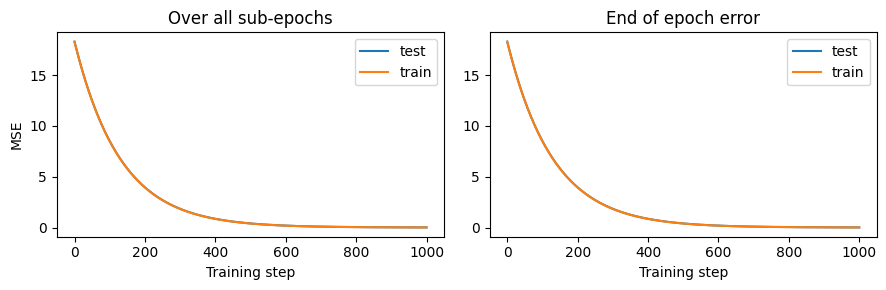

In [6]:
result_GD = GD(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
               n_epochs=1000, lr=0.2, gamma=0.1)
plot_test_results(result_GD["test_loss_list"], result_GD["train_loss_list"], 1)

### Stochastic

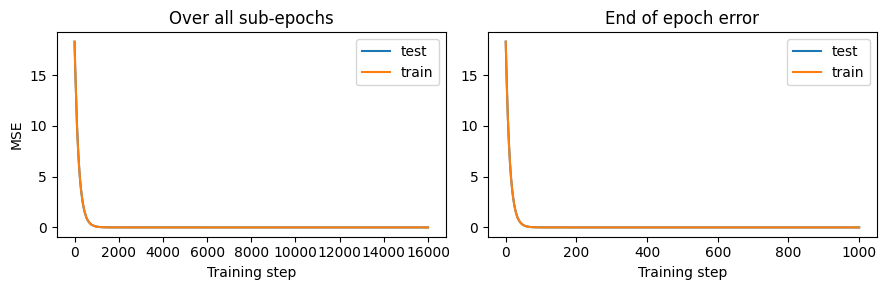

In [7]:
result_SGD = SGD(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                 n_epochs=1000, gamma=0)
plot_test_results(result_SGD["test_loss_list"], result_SGD["train_loss_list"], m)

### Adagrad

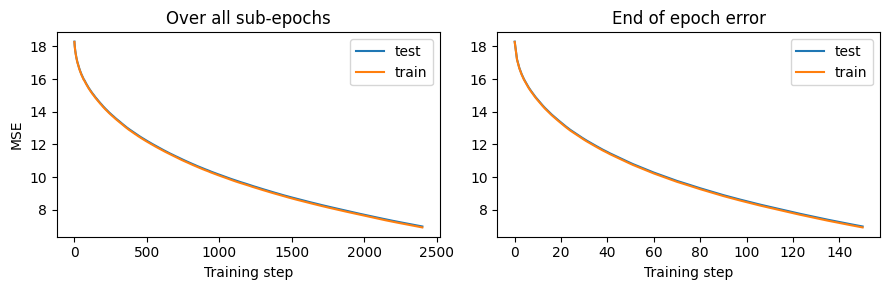

In [8]:
result_adagrad = SGD_adagrad(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                             n_epochs=150)
plot_test_results(result_adagrad["test_loss_list"], result_adagrad["train_loss_list"], m)

### RMS prop

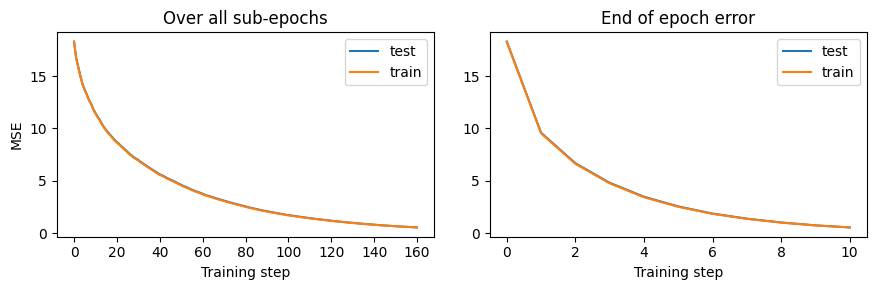

In [9]:
result_RMS_prop = SGD_RMS_prop(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                               n_epochs=10)
plot_test_results(result_RMS_prop["test_loss_list"], result_RMS_prop["train_loss_list"], m)

### Adam

2.7210178e-14 3.3684952e-14


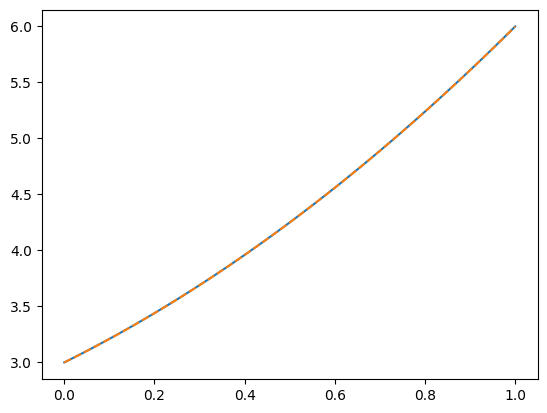

In [10]:
result_adam = SGD_adam(X_train, y_train, X_test, y_test, grad_method=loss_grad, beta0=beta0, test_loss_func=loss_func,
                       n_epochs=130)

# plot_test_results(result_adam["test_loss_list"], result_adam["train_loss_list"], m)

print(min(result_adam["test_loss_list"]), min(result_adam["train_loss_list"]))

plt.plot(x_vals, f(x_vals))
plt.plot(x_vals, model(result_adam["beta_final"], feature_matrix(x_vals, num_features)), "--")